In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
my_data_dir='/content/drive/MyDrive/test/processed_images/'


In [3]:
os.listdir(my_data_dir)


['train', 'test']

In [4]:
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [5]:
eye_types = ["normal", "cataract"]

cataract = []
normal = []

total_images = 0
for eye_type in eye_types:
    file_list = os.listdir(os.path.join(train_path, eye_type))

    if eye_type == "cataract":
        cataract.extend(file_list)
    elif eye_type == "normal":
        normal.extend(file_list)

    print(f"Number of {eye_type} images:", len(file_list))

    total_images += len(file_list)

print("Total images:", total_images)

Number of normal images: 246
Number of cataract images: 245
Total images: 491


In [6]:
eye_types = ["normal", "cataract"]

cataract = []
normal = []

total_images = 0
for eye_type in eye_types:
    file_list = os.listdir(os.path.join(test_path, eye_type))

    if eye_type == "cataract":
        cataract.extend(file_list)
    elif eye_type == "normal":
        normal.extend(file_list)

    print(f"Number of {eye_type} images:", len(file_list))

    total_images += len(file_list)

print("Total images:", total_images)

Number of normal images: 60
Number of cataract images: 17
Total images: 77


In [7]:
print(f"Train: {len(os.listdir(train_path+'/normal'))}")
print(f"Test: {len(os.listdir(test_path+'/normal'))}")

Train: 246
Test: 60


## ImageDataGenerator¶

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

##Model Creation

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)


In [11]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(500, 800),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(500, 800),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 491 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()

image_shape = (500,800,3)

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 798, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 399, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 249, 399, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 249, 399, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 397, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 123, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 123, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 196, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 188160)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     6,021,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,035,969 (23.03 MB)

 Trainable params: 6,035,745 (23.02 MB)

 Non-trainable params: 224 (896.00 B)

In [13]:
results = model.fit(train_image_gen,epochs=30,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 167s 10s/step - accuracy: 0.7107 - loss: 0.6771 - val_accuracy: 0.7792 - val_loss: 9.8675
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.7961 - loss: 0.4490 - val_accuracy: 0.8052 - val_loss: 1.4627
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.8187 - loss: 0.3922 - val_accuracy: 0.7143 - val_loss: 0.5285
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.8098 - loss: 0.4028 - val_accuracy: 0.6753 - val_loss: 0.6192
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.8704 - loss: 0.3435 - val_accuracy: 0.4416 - val_loss: 1.0228
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8511 - loss: 0.3337 - val_accuracy: 0.8182 - val_loss: 0.4292
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.8786 - loss: 0.2770 - val_accuracy: 0.4935 - val_loss: 0.7146
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.8924 - loss: 0.2809 - val_accuracy: 0.3636 - val_los

In [14]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
25,0.904277,0.227251,0.870130,0.359327
26,0.922607,0.194047,0.675325,0.751177
27,0.928717,0.185507,0.909091,0.228204
28,0.930754,0.189890,0.883117,0.419453
29,0.928717,0.191713,0.883117,0.244795


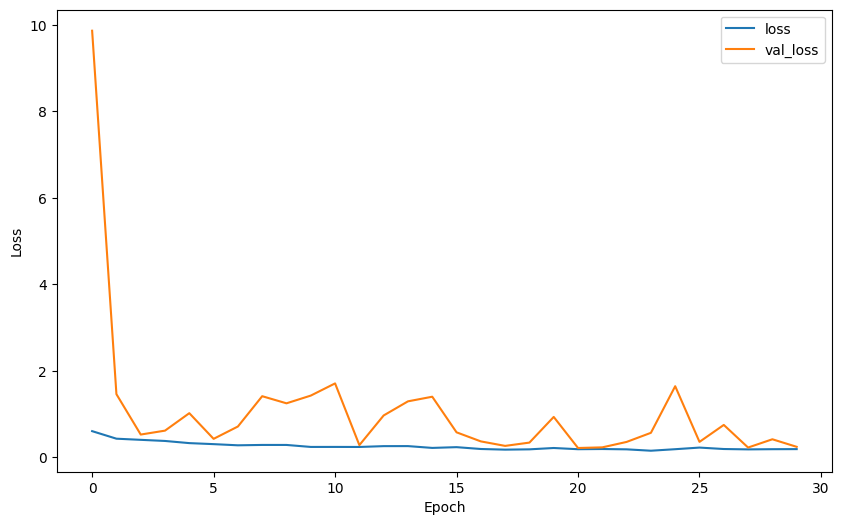

In [15]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

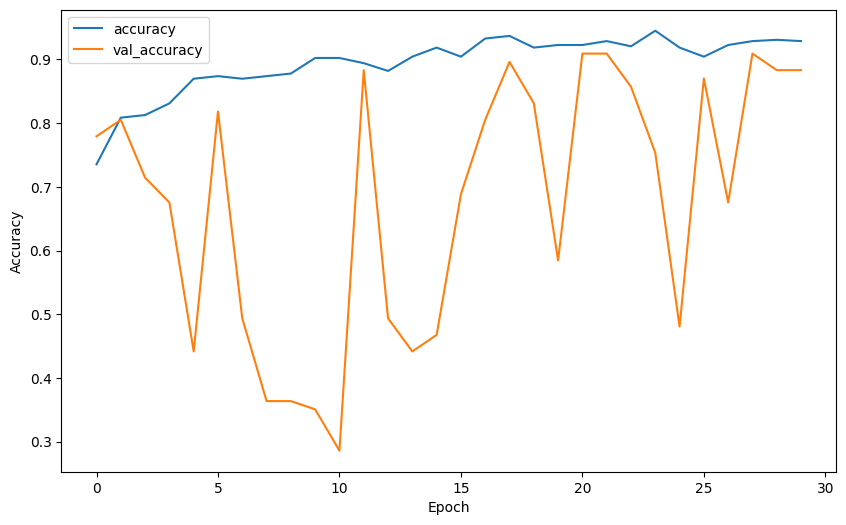

In [16]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [17]:
model.metrics_names


['loss', 'compile_metrics']

In [18]:
model.evaluate(test_image_gen)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9220 - loss: 0.2153


[0.21687978506088257, 0.9220778942108154]

In [19]:
pred_probabilities = model.predict(test_image_gen)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


In [20]:
predictions = pred_probabilities > 0.5


## classification_report

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))


              precision    recall  f1-score   support

           0       0.26      0.35      0.30        17
           1       0.80      0.72      0.75        60

    accuracy                           0.64        77
   macro avg       0.53      0.53      0.53        77
weighted avg       0.68      0.64      0.65        77



## confusion matrix

In [22]:
confusion_matrix(test_image_gen.classes,predictions)


array([[ 6, 11],
       [17, 43]])

## Save model

In [23]:
from tensorflow.keras.saving import save_model

save_model(model, 'eyes_model.keras')

In [24]:
train_image_gen.class_indices

{'cataract': 0, 'normal': 1}

## Predict test file

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('eyes_model.keras')

image_path = "/content/drive/MyDrive/test/processed_images/test/cataract/image_259.png"
img = image.load_img(image_path, target_size=(500, 800))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)
print('predicted class:', predicted_class) ## {'cataract': 0, 'normal': 1}
print("predicted confidence : ", prediction[0])

preds = model.predict(img_array)[0]
predicted_class = CLASS_LABELS[np.argmax(preds)]
confidence = float(np.max(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
predicted class: 0
predicted confidence :  [0.04350456]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [38]:
CLASS_LABELS = list(train_image_gen.class_indices.keys())
preds = model.predict(img_array)[0]
predicted_class = CLASS_LABELS[np.argmax(preds)]
confidence = float(np.max(preds))
print("predicted class : ", predicted_class)
print("predicted confidence : ", (1-confidence)*100, "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted class :  cataract
predicted confidence :  95.64954377710819 %
